# Merging Dataframes

## Using Merge function

In [1]:
import pandas as pd


In [2]:
stuff_df = pd.DataFrame({
    'Name': ['Keylly','Sally','James'],
    'Role': ['Director of HR','Course Liasion','Grader']
})
stuff_df = stuff_df.set_index('Name')

In [3]:
stuff_df

,Role
Name,
Keylly,Director of HR
Sally,Course Liasion
James,Grader


In [4]:
student_df = pd.DataFrame([
    {'Name':'James','School':'Business'},
    {'Name':'Mike','School': 'Law'},
    {'Name':'Sally','School':'Engineering'}
])
student_df = student_df.set_index('Name')

In [5]:
student_df

,School
Name,
James,Business
Mike,Law
Sally,Engineering


In [6]:
# outer join in pandas
df = pd.merge(stuff_df,student_df,how='outer',left_index=True,right_index=True)

In [7]:
df

,Role,School
Name,,
James,Grader,Business
Keylly,Director of HR,NaN
Mike,NaN,Law
Sally,Course Liasion,Engineering


In [8]:
# inner join in pandas
df2 = pd.merge(stuff_df,student_df,how='inner',left_index=True,right_index=True)

In [9]:
df2

,Role,School
Name,,
Sally,Course Liasion,Engineering
James,Grader,Business


In [10]:
# left join in pandas
df3 = pd.merge(stuff_df,student_df,how='left',left_index=True,right_index=True)

In [11]:
df3

,Role,School
Name,,
Keylly,Director of HR,NaN
Sally,Course Liasion,Engineering
James,Grader,Business


In [12]:
# right join in pandas
df4 = pd.merge(stuff_df,student_df,how='right',left_index=True,right_index=True)

In [13]:
df4

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course Liasion,Engineering


In [14]:
student_df = student_df.reset_index()
stuff_df = stuff_df.reset_index()

### Pandas Joining without indexing

In [15]:
df5 = pd.merge(stuff_df,student_df, how='right',on='Name')

In [16]:
df5

,Name,Role,School
0,James,Grader,Business
1,Mike,NaN,Law
2,Sally,Course Liasion,Engineering


In [17]:
df6 = pd.merge(student_df,stuff_df, how='right',on='Name')

In [18]:
df6

,Name,School,Role
0,Keylly,NaN,Director of HR
1,Sally,Engineering,Course Liasion
2,James,Business,Grader


In [19]:
staff_df1 = pd.DataFrame([
    {'Name':'Kelly','Role':'Director Of HR','Location':'State Street'},
    {'Name':'Sally','Role':'Course liasion','Location':'Washington Avenue'},
    {'Name':'James','Role':'Grader','Location':'Washington Avenue'}
])

In [20]:
student_df1 = pd.DataFrame([
    {'Name':'James','School':'Business','Location':'1024 Billiard Avenue'},
    {'Name':'Mike','School':'Law','Location':'Fraternity House #22'},
    {'Name':'Sally','School':'Engineering','Location':' 512 Wilson Crescent'}
])

In [21]:
student_df1

,Name,School,Location
0,James,Business,1024 Billiard Avenue
1,Mike,Law,Fraternity House #22
2,Sally,Engineering,512 Wilson Crescent


In [22]:
pd.merge(staff_df1,student_df1, how='left', on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director Of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [23]:
pd.merge(student_df1,staff_df1,how='left', on='Name')

,Name,School,Location_x,Role,Location_y
0,James,Business,1024 Billiard Avenue,Grader,Washington Avenue
1,Mike,Law,Fraternity House #22,NaN,NaN
2,Sally,Engineering,512 Wilson Crescent,Course liasion,Washington Avenue


In [24]:
pd.merge(staff_df1,student_df1,how='outer', on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director Of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue
3,Mike,NaN,NaN,Law,Fraternity House #22


In [25]:
pd.merge(staff_df1,student_df1,how='inner', on='Name')

,Name,Role,Location_x,School,Location_y
0,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
1,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


In [26]:
staff_df2 = pd.DataFrame([
    {'First Name':'Kelly','Last Name':'Desjardins','Role':'Director Of HR'},
    {'First Name':'Sally','Last Name':'Brooks','Role':'Course liasion'},
    {'First Name':'James','Last Name':'Wilde','Role':'Grader'}
])


student_df2 = pd.DataFrame([
    {'First Name':'James','Last Name':'Hammond','School':'Business'},
    {'First Name':'Mike','Last Name':'Smith','School':'Law'},
    {'First Name':'Sally','Last Name':'Brooks','School':'Engineering'}
])

In [27]:
pd.merge(staff_df2,student_df2, how='inner', on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


In [28]:
pd.merge(staff_df2,student_df2, how='inner', on='Last Name')

,First Name_x,Last Name,Role,First Name_y,School
0,Sally,Brooks,Course liasion,Sally,Engineering


In [29]:
pd.merge(student_df2,staff_df2, how='inner', on='Last Name')

,First Name_x,Last Name,School,First Name_y,Role
0,Sally,Brooks,Engineering,Sally,Course liasion


In [30]:
pd.merge(staff_df2,student_df2, how='right', on='Last Name')

,First Name_x,Last Name,Role,First Name_y,School
0,NaN,Hammond,NaN,James,Business
1,NaN,Smith,NaN,Mike,Law
2,Sally,Brooks,Course liasion,Sally,Engineering


In [31]:
pd.merge(staff_df2,student_df2, how='right', on=['Last Name','First Name'])

,First Name,Last Name,Role,School
0,James,Hammond,NaN,Business
1,Mike,Smith,NaN,Law
2,Sally,Brooks,Course liasion,Engineering


In [32]:
pd.merge(stuff_df,student_df,how='right',left_index=True,right_index=True)

,Name_x,Role,Name_y,School
0,Keylly,Director of HR,James,Business
1,Sally,Course Liasion,Mike,Law
2,James,Grader,Sally,Engineering


## using concat function

In [33]:
student10 = pd.DataFrame({
    'Name':['Shohel','Shakil'],
    'Mark':[78,90]
})

In [34]:
student10

,Name,Mark
0,Shohel,78
1,Shakil,90


In [35]:
student11 = pd.DataFrame({
    'Name':['Rohim','Karim'],
    'Mark':[88,70]
})

In [36]:
student11

,Name,Mark
0,Rohim,88
1,Karim,70


In [37]:
student12 = pd.DataFrame({
    'Name':['Apu','Bubli'],
    'Mark':[56,57]
})

In [38]:
al_student = [student10,student11,student12]

In [39]:
pd.concat(al_student)

,Name,Mark
0,Shohel,78
1,Shakil,90
0,Rohim,88
1,Karim,70
0,Apu,56
1,Bubli,57


In [40]:
len(student10) + len(student11) + len(student12)

6

In [41]:
pd.concat(al_student,keys=['Student10','Student11','Student12'])

Name  Mark
Student10 0  Shohel    78
          1  Shakil    90
Student11 0   Rohim    88
          1   Karim    70
Student12 0     Apu    56
          1   Bubli    57

# Pandas Idioms

In [42]:
import numpy as np
import pandas as ps
import timeit

In [43]:
census = pd.read_csv('datasets/Week2/census.csv')

In [44]:
census

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [45]:
(census.where(census['SUMLEV']==50)
 .dropna()
 .set_index(['SUMLEV','CTYNAME'])
 .rename(columns={'ESTIMATESBASE2010':'estimate base 2010'})
)

REGION  DIVISION  STATE  COUNTY   STNAME  \
SUMLEV CTYNAME                                                       
50.0   Autauga County        3.0       6.0    1.0     1.0  Alabama   
       Baldwin County        3.0       6.0    1.0     3.0  Alabama   
       Barbour County        3.0       6.0    1.0     5.0  Alabama   
       Bibb County           3.0       6.0    1.0     7.0  Alabama   
       Blount County         3.0       6.0    1.0     9.0  Alabama   
...                          ...       ...    ...     ...      ...   
       Sweetwater County     4.0       8.0   56.0    37.0  Wyoming   
       Teton County          4.0       8.0   56.0    39.0  Wyoming   
       Uinta County          4.0       8.0   56.0    41.0  Wyoming   
       Washakie County       4.0       8.0   56.0    43.0  Wyoming   
       Weston County         4.0       8.0   56.0    45.0  Wyoming   

                          CENSUS2010POP  estimate base 2010  POPESTIMATE2010  \
SUMLEV CTYNAME                                                                 
50.0   Autauga County           54571.0             54571.0          54660.0   
       Baldwin County          182265.0            182265.0         183193.0   
       Barbour County           27457.0             27457.0          27341.0   
       Bibb County              22915.0             22919.0          22861.0   
       Blount County            57322.0             57322.0          57373.0   
...                                 ...                 ...              ...   
       Sweetwater County        43806.0             43806.0          43593.0   
       Teton County             21294.0             21294.0          21297.0   
       Uinta County             21118.0             21118.0          21102.0   
       Washakie County           8533.0              8533.0           8545.0   
       Weston County             7208.0              7208.0           7181.0   

                          POPESTIMATE2011  POPESTIMATE2012  ...  \
SUMLEV CTYNAME                                              ...   
50.0   Autauga County             55253.0          55175.0  ...   
       Baldwin County            186659.0         190396.0  ...   
       Barbour County             27226.0          27159.0  ...   
       Bibb County                22733.0          22642.0  ...   
       Blount County              57711.0          57776.0  ...   
...                                   ...              ...  ...   
       Sweetwater County          44041.0          45104.0  ...   
       Teton County               21482.0          21697.0  ...   
       Uinta County               20912.0          20989.0  ...   
       Washakie County             8469.0           8443.0  ...   
       Weston County               7114.0           7065.0  ...   

                          RDOMESTICMIG2011  RDOMESTICMIG2012  \
SUMLEV CTYNAME                                                 
50.0   Autauga County             7.242091         -2.915927   
       Baldwin County            14.832960         17.647293   
       Barbour County            -4.728132         -2.500690   
       Bibb County               -5.527043         -5.068871   
       Blount County              1.807375         -1.177622   
...                                    ...               ...   
       Sweetwater County          1.072643         16.243199   
       Teton County              -1.589565          0.972695   
       Uinta County             -17.755986         -4.916350   
       Washakie County          -11.637475         -0.827815   
       Weston County            -11.752361         -8.040059   

                          RDOMESTICMIG2013  RDOMESTICMIG2014  \
SUMLEV CTYNAME                                                 
50.0   Autauga County            -3.012349          2.265971   
       Baldwin County            21.845705         19.243287   
       Barbour County            -7.056824         -3.904217   
       Bibb County               -6.201001       

In [46]:
census = census[census['SUMLEV'] == 50]

In [47]:
census.set_index(['SUMLEV','CTYNAME'])
census.rename(columns={'ESTIMATESBASE2010':'estimate base 2010'})

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,estimate base 2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [48]:
def first_approch():
    global census
    
    return (census.where(census['SUMLEV']==50)
             .dropna()
             .set_index(['SUMLEV','CTYNAME'])
             .rename(columns={'ESTIMATESBASE2010':'estimate base 2010'})
)
census = pd.read_csv('datasets/Week2/census.csv')
timeit.timeit(first_approch,number=10)

0.25704419300018344

In [49]:
def second_approch():
    global census
    
    new_census = census[census['SUMLEV']==50]
    new_census = census[census].set_index(['SUMLEV','CTYNAME'], inplace=True)
    
    return new_census.rename(columns={'ESTIMATESBASE2010':'estimate base 2010'})


census = pd.read_csv('datasets/Week2/census.csv')
timeit.timeit(first_approch,number=10)

0.18941050399735104

In [50]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    
    return pd.Series({'min':np.min(data),'Max':np.max(data)})

In [51]:
census.apply(min_max, axis='columns')

,min,Max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
...,...,...
3188,43593,45162
3189,21297,23125
3190,20822,21102
3191,8316,8545


In [52]:
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.max(data)
    return row

In [53]:
census.apply(min_max,axis='columns')

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,max,min
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,4858979,4858979
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,55347,55347
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,203709,203709
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,27341,27341
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,22861,22861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,45162,45162
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,23125,23125
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,21102,21102
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,8545,8545


In [54]:
rows = ['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014','POPESTIMATE2015']


In [55]:
census.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

In [56]:
census.apply(lambda x:np.max(x[rows]),axis=1).head()

0    4858979
1      55347
2     203709
3      27341
4      22861
dtype: int64

In [57]:
def get_state(x):
    northeast = ['Connecticut','Maine','Vermont']
    midweast = ['Indiana','North Dakota','South Dakota']
    south  = ['North California','South California']
    west = ['Idaho','Montana','Nevada']
    
    if x in northeast:
        return 'northeast'
    elif x in midweast:
        return 'midweast'
    elif  x in south:
        return 'south'
    elif x in west:
        return 'west'
    else:
        'N/A'

In [58]:
census['state_region'] = census['STNAME'].apply(lambda x:get_state(x))

In [59]:
census

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,state_region
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594,None
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,None
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,None
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,None
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,None
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,None
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,None
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,None


In [60]:
census.sample(20)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,state_region
1449,50,3,6,28,47,Mississippi,Harrison County,187105,187105,187896,...,5.059276,7.569836,3.997055,4.917934,9.455279,9.130616,10.132408,6.299157,7.756742,None
2395,50,3,5,45,77,South Carolina,Pickens County,119224,119226,119212,...,-0.786292,-6.991016,8.481007,4.391015,0.595041,1.212897,-4.763938,11.007797,6.875405,None
1795,50,1,1,33,3,New Hampshire,Carroll County,47818,47820,47821,...,-0.146734,-1.134943,1.243847,1.457895,0.481333,0.209619,-0.735611,1.707654,1.943860,None
2024,40,2,4,38,0,North Dakota,North Dakota,672591,672591,674530,...,16.009040,22.241532,12.479623,13.314923,10.558471,18.470861,24.449274,14.782061,15.675696,midweast
2479,50,3,6,47,17,Tennessee,Carroll County,28522,28505,28466,...,4.057576,-3.293623,-6.280986,-8.482278,6.662576,4.337408,-3.013315,-5.857549,-8.054600,None
3098,50,2,3,55,3,Wisconsin,Ashland County,16157,16157,16163,...,-12.316734,8.634714,2.427411,-12.782355,-5.086060,-12.191691,8.759855,2.551894,-12.657038,None
2132,50,2,3,39,107,Ohio,Mercer County,40814,40814,40782,...,-1.714636,-5.979440,-0.342726,-4.127286,-3.480776,-1.518677,-5.758886,-0.073441,-3.858647,None
680,50,2,3,17,143,Illinois,Peoria County,186494,186494,186218,...,-3.836820,0.069237,-13.578600,-11.697723,-1.421483,-1.808710,2.210263,-11.187702,-9.287478,None
2881,50,3,5,51,29,Virginia,Buckingham County,17146,17140,17111,...,-8.588455,1.988304,-13.792699,5.594982,3.790972,-8.004207,2.631579,-13.147083,6.242822,None
1735,50,2,4,31,107,Nebraska,Knox County,8701,8701,8676,...,-0.116462,-1.865563,-7.149136,2.582008,-7.182993,0.232924,-1.515770,-6.797539,2.934100,None


In [61]:
census[['STNAME','state_region']].sample(10)

,STNAME,state_region
1408,Minnesota,None
142,Arkansas,None
1300,Michigan,None
3103,Wisconsin,None
1659,Montana,west
1597,Missouri,None
1672,Montana,west
2472,Tennessee,None
1511,Missouri,None
263,Colorado,None


# Group by in Pandas

In [62]:
census = census[census['SUMLEV']==50]

In [63]:
census

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,state_region
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,None
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,None
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,None
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861,None
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195,None
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747,None
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351,None
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961,None


In [64]:
%%timeit -n 3

for state in census['STNAME'].unique():
    avg = np.average(census.where(census['STNAME']==state).dropna()['CENSUS2010POP'])
    print('State ' + state + 'have an avarage population ' +str(avg))

/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan

/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_


State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan
State Arizonahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan
State Idahohave an avarage population 35626.86363636364


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan
State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan
State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
State Alabamahave an avarage population nan
State Alaskahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Arizonahave an avarage population nan
State Arkansashave an avarage population nan
State Californiahave an avarage population nan
State Coloradohave an avarage population nan
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population nan
State District of Columbiahave an avarage population nan
State Floridahave an avarage population nan
State Georgiahave an avarage population nan
State Hawaiihave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population nan
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population nan
State Kansashave an avarage population nan
State Kentuckyhave an avarage population nan
State Louisianahave an avarage population nan
State Mainehave an avarage population 83022.5625
State Marylandhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State Massachusettshave an avarage population nan
State Michiganhave an avarage population nan
State Minnesotahave an avarage population nan
State Mississippihave an avarage population nan
State Missourihave an avarage population nan
State Montanahave an avarage population 17668.125
State Nebraskahave an avarage population nan
State Nevadahave an avarage population 158855.9411764706
State New Hampshirehave an avarage population nan
State New Jerseyhave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State New Mexicohave an avarage population nan
State New Yorkhave an avarage population nan
State North Carolinahave an avarage population nan
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population nan
State Oklahomahave an avarage population nan
State Oregonhave an avarage population nan
State Pennsylvaniahave an avarage population nan
State Rhode Islandhave an avarage population nan
State South Carolinahave an avarage population nan


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population nan
State Texashave an avarage population nan
State Utahhave an avarage population nan
State Vermonthave an avarage population 44695.78571428572
State Virginiahave an avarage population nan
State Washingtonhave an avarage population nan
State West Virginiahave an avarage population nan
State Wisconsinhave an avarage population nan
State Wyominghave an avarage population nan
1.14 s ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/shohel/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/shohel/.local/lib/python3.8/site-packages/numpy/lib/function_

In [65]:
%%timeit -n 3

for group,frame in census.groupby('STNAME'):
    avg = np.average(frame['CENSUS2010POP'])
    
    print('State ' + group + 'have an avarage population ' +str(avg))

State Alabamahave an avarage population 71339.34328358209
State Alaskahave an avarage population 24490.724137931036
State Arizonahave an avarage population 426134.4666666667
State Arkansashave an avarage population 38878.90666666667
State Californiahave an avarage population 642309.5862068966
State Coloradohave an avarage population 78581.1875
State Connecticuthave an avarage population 446762.125
State Delawarehave an avarage population 299311.3333333333
State District of Columbiahave an avarage population 601723.0
State Floridahave an avarage population 280616.5671641791
State Georgiahave an avarage population 60928.63522012578
State Hawaiihave an avarage population 272060.2
State Idahohave an avarage population 35626.86363636364
State Illinoishave an avarage population 125790.50980392157
State Indianahave an avarage population 70476.10869565218
State Iowahave an avarage population 30771.262626262625
State Kansashave an avarage population 27172.55238095238
State Kentuckyhave an avara

State New Hampshirehave an avarage population 131647.0
State New Jerseyhave an avarage population 418661.61904761905
State New Mexicohave an avarage population 62399.36363636364
State New Yorkhave an avarage population 312550.03225806454
State North Carolinahave an avarage population 95354.83
State North Dakotahave an avarage population 12690.396226415094
State Ohiohave an avarage population 131096.63636363635
State Oklahomahave an avarage population 48718.844155844155
State Oregonhave an avarage population 106418.72222222222
State Pennsylvaniahave an avarage population 189587.74626865672
State Rhode Islandhave an avarage population 210513.4
State South Carolinahave an avarage population 100551.39130434782
State South Dakotahave an avarage population 12336.060606060606
State Tennesseehave an avarage population 66801.1052631579
State Texashave an avarage population 98998.27165354331
State Utahhave an avarage population 95306.37931034483
State Vermonthave an avarage population 44695.7857

In [66]:
census.groupby('STNAME').head(3)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,state_region
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333,None
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499,None
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299,None
69,50,4,9,2,13,Alaska,Aleutians East Borough,3141,3141,3169,...,-12.221204,-17.257039,-27.748454,-16.221087,19.305620,8.249313,5.752346,-3.920977,7.509763,None
70,50,4,9,2,16,Alaska,Aleutians West Census Area,5561,5561,5546,...,0.000000,-13.711875,-11.179039,-26.717891,1.257410,13.314397,0.175793,4.890830,-10.826858,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,50,2,3,55,3,Wisconsin,Ashland County,16157,16157,16163,...,-12.316734,8.634714,2.427411,-12.782355,-5.086060,-12.191691,8.759855,2.551894,-12.657038,None
3099,50,2,3,55,5,Wisconsin,Barron County,45870,45870,45840,...,-4.928472,-4.811057,-4.585495,-0.614939,1.504087,-3.859909,-3.630161,-3.225205,0.746711,None
3170,50,4,8,56,1,Wyoming,Albany County,36299,36299,36428,...,2.637812,-3.544634,-3.334877,-9.911169,6.736119,6.433032,0.719587,1.429233,-5.166460,None
3171,50,4,8,56,3,Wyoming,Big Horn County,11668,11668,11672,...,2.804930,16.815908,-8.026420,5.095861,4.868258,3.144921,17.236306,-7.608378,5.513554,None


In [67]:
census =census.set_index('STNAME')

def set_batch_number(item):
    if item[0] < 'M':
        return 0
    if item[0] < 'Q':
        return 1
    return 2

In [68]:
for key, item in census.groupby(set_batch_number):
    print('There Are '+ str(len(item)) + ' Records ' + str(key) + ' for processing' )

There Are 1177 Records 0 for processing
There Are 1134 Records 1 for processing
There Are 831 Records 2 for processing


In [69]:
housing = pd.read_csv('datasets/Week2/homeprices_multi_variable.csv')

In [70]:
housing.head(2)

,area,bedrooms,age,price,type,Class
0,2600,3,20,550000,city,exotic
1,3000,4,15,595000,city,normal


In [71]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV'] ==50]

In [72]:
df.shape

(3142, 100)

In [73]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average})

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207
Colorado,78581.187500
Connecticut,446762.125000
Delaware,299311.333333
District of Columbia,601723.000000


In [74]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.min})

,CENSUS2010POP
STNAME,
Alabama,9045
Alaska,662
Arizona,8437
Arkansas,5368
California,1175
Colorado,699
Connecticut,118428
Delaware,162310
District of Columbia,601723


In [75]:
df.groupby('STNAME').agg({'POPESTIMATE2010':np.max})

,POPESTIMATE2010
STNAME,
Alabama,658116
Alaska,293405
Arizona,3825597
Arkansas,383628
California,9826009
Colorado,626916
Connecticut,919744
Delaware,538911
District of Columbia,605126


In [76]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


/tmp/ipykernel_128949/817127102.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))


In [77]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [78]:
df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

In [79]:
df = pd.read_csv('datasets/Week3/listings.csv')

In [80]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
0,2818.0,https://www.airbnb.com/rooms/2818,20220907151523,2022-09-07,city scrape,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20168.0,https://www.airbnb.com/rooms/20168,20220907151523,2022-09-07,previous scrape,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27886.0,https://www.airbnb.com/rooms/27886,20220907151523,2022-09-07,city scrape,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28871.0,https://www.airbnb.com/rooms/28871,20220907151523,2022-09-07,city scrape,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,29051.0,https://www.airbnb.com/rooms/29051,20220907151523,2022-09-07,city scrape,Comfortable single room,This room can also accomodate 2 people. For a...,the street is quite lively especially on weeke...,https://a0.muscache.com/pictures/162009/bd6be2...,124245,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [82]:
df['has_availability'].unique()
# review_scores_value

array(['t', nan, 'f', '2.3', '4', '3', '1', '2', '1.5 baths', '40'],
      dtype=object)

In [83]:
df = df.set_index(['has_availability','review_scores_value'])

for group, frame in df.groupby(level=(0,1)):
    print(group)

('1', '2022-08-12')
('1', '2022-08-19')
('1.5 baths', '3')
('2', '4.84')
('2.3', '4.44')
('3', '4.97')
('4', '5')
('40', '4.95')
('f', '3.4')
('f', '3.5')
('f', '4')
('f', '4.19')
('f', '4.23')
('f', '4.42')
('f', '4.44')
('f', '4.5')
('f', '4.52')
('f', '4.56')
('f', '4.64')
('f', '4.73')
('f', '4.78')
('f', '4.85')
('f', '5')
('t', '1')
('t', '2')
('t', '2.5')
('t', '2.71')
('t', '2.8')
('t', '3')
('t', '3.2')
('t', '3.33')
('t', '3.38')
('t', '3.4')
('t', '3.44')
('t', '3.47')
('t', '3.5')
('t', '3.55')
('t', '3.6')
('t', '3.62')
('t', '3.63')
('t', '3.67')
('t', '3.71')
('t', '3.75')
('t', '3.76')
('t', '3.8')
('t', '3.81')
('t', '3.82')
('t', '3.83')
('t', '3.85')
('t', '3.86')
('t', '3.88')
('t', '3.89')
('t', '3.91')
('t', '3.92')
('t', '3.94')
('t', '3.95')
('t', '3.96')
('t', '3.97')
('t', '3.98')
('t', '4')
('t', '4.01')
('t', '4.03')
('t', '4.04')
('t', '4.05')
('t', '4.07')
('t', '4.08')
('t', '4.09')
('t', '4.1')
('t', '4.11')
('t', '4.12')
('t', '4.13')
('t', '4.14')
('t'

In [84]:
def grouping_fun(item):
    if item[1] =='10.0':
        return(item[0],'10.0')
    else:
        return(item[0],'not 10.0')

In [85]:
for group, frame in df.groupby(by=grouping_fun):
    print(group)

('1', 'not 10.0')
('1.5 baths', 'not 10.0')
('2', 'not 10.0')
('2.3', 'not 10.0')
('3', 'not 10.0')
('4', 'not 10.0')
('40', 'not 10.0')
('f', 'not 10.0')
('t', 'not 10.0')
(nan, 'not 10.0')


In [88]:
df.sample(20)

id  \
has_availability review_scores_value                 
t                4.73                 1.933054e+07   
                 4.39                 2.771135e+07   
                 4.33                 6.294883e+17   
                 4                    5.237818e+07   
                 4.7                  1.734582e+06   
                 4.55                 4.247919e+07   
                 5                    6.397638e+17   
                 4.83                 5.039758e+07   
                 4.64                 2.485518e+07   
NaN              5                    3.351646e+07   
t                4.65                 4.372380e+07   
                 NaN                  5.090370e+07   
                 4.38                 2.792174e+07   
NaN              5                    3.863498e+07   
t                4.81                 5.122348e+07   
                 4.71                 6.255736e+06   
                 NaN                  3.051925e+07   
                 4.53                 9.530785e+06   
                 4.67                 1.294909e+07   
                 4.56                 2.180128e+07   

                                                                          listing_url  \
has_availability review_scores_value                                                    
t                4.73                           https://www.airbnb.com/rooms/19330535   
                 4.39                           https://www.airbnb.com/rooms/27711346   
                 4.33                 https://www.airbnb.com/rooms/629488329829725670   
                 4                              https://www.airbnb.com/rooms/52378184   
                 4.7                             https://www.airbnb.com/rooms/1734582   
                 4.55                           https://www.airbnb.com/rooms/42479193   
                 5                    https://www.airbnb.com/rooms/639763820481500624   
                 4.83                           https://www.airbnb.com/rooms/50397584   
                 4.64                           https://www.airbnb.com/rooms/24855185   
NaN              5                              https://www.airbnb.com/rooms/33516464   
t                4.65                           https://www.airbnb.com/rooms/43723802   
                 NaN                            https://www.airbnb.com/rooms/50903699   
                 4.38                           https://www.airbnb.com/rooms/27921739   
NaN              5                              https://www.airbnb.com/rooms/38634976   
t                4.81                           https://www.airbnb.com/rooms/51223482   
                 4.71                            https://www.airbnb.com/rooms/6255736   
                 NaN                            https://www.airbnb.com/rooms/30519246   
                 4.53                            https://www.airbnb.com/rooms/9530785   
                 4.67                           https://www.airbnb.com/rooms/12949094   
                 4.56                           https://www.airbnb.com/rooms/21801282   

                                           scrape_id last_scraped  \
has_availability review_scores_value                                
t                4.73                 20220907151523   2022-09-07   
                 4.39                 20220907151523   2022-09-07   
                 4.33                 20220907151523   2022-09-07   
                 4                    20220907151523   2022-09-07   
                 4.7                  20220907151523   2022-09-07   
                 4.55                 20220907151523   2022-09-07   
                 5                    20220907151523   2022-09-07   
                 4.83                 20220907151523   2022-09-07   
                 4.64                 20220907151523   2022-09-07   
NaN              5                    20220907151523   2022-09-07   
t                4.65                 20220907151523   2022-09-07   
   

In [95]:
df = df.reset_index()
df['source'].astype('str')

0           city scrape
1       previous scrape
2           city scrape
3           city scrape
4           city scrape
             ...       
6888    previous scrape
6889    previous scrape
6890    previous scrape
6891    previous scrape
6892    previous scrape
Name: source, Length: 6893, dtype: object

In [111]:
#df.groupby('source').agg({'review_scores_value':np.average})

In [112]:
df1 = pd.read_csv('datasets/Week2/census.csv')

In [113]:
df1.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861


In [114]:
df1.groupby('STNAME').agg({'CENSUS2010POP':np.average})

,CENSUS2010POP
STNAME,
Alabama,1.405805e+05
Alaska,4.734873e+04
Arizona,7.990021e+05
Arkansas,7.673468e+04
California,1.262846e+06
Colorado,1.547445e+05
Connecticut,7.942438e+05
Delaware,4.489670e+05
District of Columbia,6.017230e+05


In [115]:
df1.groupby('STNAME').agg({'CENSUS2010POP':np.mean,'POPESTIMATE2010':np.min})



,CENSUS2010POP,POPESTIMATE2010
STNAME,,
Alabama,1.405805e+05,9001
Alaska,4.734873e+04,662
Arizona,7.990021e+05,8339
Arkansas,7.673468e+04,5338
California,1.262846e+06,1159
Colorado,1.547445e+05,704
Connecticut,7.942438e+05,118593
Delaware,4.489670e+05,162990
District of Columbia,6.017230e+05,605126


In [116]:
cols = ['STNAME','CENSUS2010POP']
transform_df = df1[cols].groupby('STNAME').transform(np.min)

In [117]:
transform_df.head()

,CENSUS2010POP
0,9045
1,9045
2,9045
3,9045
4,9045


# Scaling in pandas

In [123]:
df2 = pd.DataFrame(['A+','A','A-','B+','B','B-','C+','C','C-','D+','D'],
                  index=['Excellent','Excellent','Excellent','good','good','goog',
                        'ok','ok','ok','poor','poor'],columns=['Grades'])

In [124]:
df2

,Grades
Excellent,A+
Excellent,A
Excellent,A-
good,B+
good,B
goog,B-
ok,C+
ok,C
ok,C-
poor,D+


In [126]:
df2.dtypes

Grades    object
dtype: object

In [127]:
df2['Grades'].astype('category').head()

Excellent    A+
Excellent     A
Excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['A', 'A+', 'A-', 'B', ..., 'C+', 'C-', 'D', 'D+']

In [128]:
my_categories = pd.CategoricalDtype(categories=['D','D+','C-','C','C+',
                                               'B-','B','B+','A-','A','A+'],ordered=True)

In [130]:
grades = df2['Grades'].astype(my_categories)

In [131]:
grades.head()

Excellent    A+
Excellent     A
Excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [132]:
df2[df2['Grades'] > 'C']

,Grades
ok,C+
ok,C-
poor,D+
poor,D


In [133]:
grades[grades > 'C']

Excellent    A+
Excellent     A
Excellent    A-
good         B+
good          B
goog         B-
ok           C+
Name: Grades, dtype: category
Categories (11, object): ['D' < 'D+' < 'C-' < 'C' ... 'B+' < 'A-' < 'A' < 'A+']

In [135]:
df1[df1['SUMLEV'] == 50]

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [136]:
df1 = df1.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(np.average)

In [141]:
df1.head()

STNAME
Alabama       1.405805e+05
Alaska        4.734873e+04
Arizona       7.990021e+05
Arkansas      7.673468e+04
California    1.262846e+06
Name: CENSUS2010POP, dtype: float64

In [143]:
df1

STNAME
Alabama                 1.405805e+05
Alaska                  4.734873e+04
Arizona                 7.990021e+05
Arkansas                7.673468e+04
California              1.262846e+06
Colorado                1.547445e+05
Connecticut             7.942438e+05
Delaware                4.489670e+05
District of Columbia    6.017230e+05
Florida                 5.529797e+05
Georgia                 1.210957e+05
Hawaii                  4.534337e+05
Idaho                   6.967031e+04
Illinois                2.491385e+05
Indiana                 1.394366e+05
Iowa                    6.092710e+04
Kansas                  5.383242e+04
Kentucky                7.172507e+04
Louisiana               1.394884e+05
Maine                   1.562778e+05
Maryland                4.618842e+05
Massachusetts           8.730172e+05
Michigan                2.353248e+05
Minnesota               1.205438e+05
Mississippi             7.150113e+04
Missouri                1.032574e+05
Montana                 3.47163

In [142]:
pd.cut(df1,10)

STNAME
Alabama                    (23065.339, 148158.089]
Alaska                     (23065.339, 148158.089]
Arizona                    (767429.132, 891283.34]
Arkansas                   (23065.339, 148158.089]
California              (1138991.758, 1262845.966]
Colorado                  (148158.089, 272012.298]
Connecticut                (767429.132, 891283.34]
Delaware                  (395866.506, 519720.715]
District of Columbia      (519720.715, 643574.923]
Florida                   (519720.715, 643574.923]
Georgia                    (23065.339, 148158.089]
Hawaii                    (395866.506, 519720.715]
Idaho                      (23065.339, 148158.089]
Illinois                  (148158.089, 272012.298]
Indiana                    (23065.339, 148158.089]
Iowa                       (23065.339, 148158.089]
Kansas                     (23065.339, 148158.089]
Kentucky                   (23065.339, 148158.089]
Louisiana                  (23065.339, 148158.089]
Maine                   

# pivot table in pandas

In [145]:
df = pd.read_csv('datasets/Week3/cwurData.csv')

In [146]:
df

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [147]:
def create_category_university(ranking):
    if (ranking>=1) & (ranking<=100):
        return 'First Tier Top University'
    elif(ranking>=101) & (ranking<=200):
        return 'Second Tier Top University'
    elif(ranking>=201)&(ranking<=300):
        return 'Third Tier Top University'
    else:
        return 'Other Top Univerrsity'
    

In [148]:
df['rank_level'] = df['world_rank'].apply(lambda x:create_category_university(x))

In [149]:
df.head(3)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year,rank_level
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012,First Tier Top University
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012,First Tier Top University
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012,First Tier Top University


In [151]:
df.pivot_table(index='country',columns='rank_level',values='score',aggfunc=[np.mean]).head()

mean                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN             44.672857   
Australia                    47.9425             44.645750   
Austria                          NaN             44.864286   
Belgium                      51.8750             45.081000   
Brazil                           NaN             44.499706   

                                                                 
rank_level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                     49.2425                 47.285000  
Austria                           NaN                 47.066667  
Belgium                       49.0840                 46.746667  
Brazil                        49.5650                       NaN

In [152]:
df.pivot_table(index='country',columns='rank_level',values='score',aggfunc=[np.nanmean]).head()

nanmean                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN             44.672857   
Australia                    47.9425             44.645750   
Austria                          NaN             44.864286   
Belgium                      51.8750             45.081000   
Brazil                           NaN             44.499706   

                                                                 
rank_level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                     49.2425                 47.285000  
Austria                           NaN                 47.066667  
Belgium                       49.0840                 46.746667  
Brazil                        49.5650                       NaN

In [155]:
df.pivot_table(index='country',columns='rank_level',values='score',aggfunc=[np.max,np.mean]).head()

amax                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN                 45.66   
Australia                      51.61                 45.97   
Austria                          NaN                 46.29   
Belgium                        52.03                 46.21   
Brazil                           NaN                 46.08   

                                                                 \
rank_level Second Tier Top University Third Tier Top University   
country                                                           
Argentina                         NaN                       NaN   
Australia                       50.40                     47.47   
Austria                           NaN                     47.78   
Belgium                         49.73                     47.14   
Brazil                          49.82                       NaN   

                                mean                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN             44.672857   
Australia                    47.9425             44.645750   
Austria                          NaN             44.864286   
Belgium                      51.8750             45.081000   
Brazil                           NaN             44.499706   

                                                                 
rank_level Second Tier Top University Third Tier Top University  
country                                                          
Argentina                         NaN                       NaN  
Australia                     49.2425                 47.285000  
Austria                           NaN                 47.066667  
Belgium                       49.0840                 46.746667  
Brazil                        49.5650                       NaN

In [156]:
df.pivot_table(index='country',columns='rank_level',values='score',aggfunc=[np.max,np.mean],margins=True).head()

amax                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN                 45.66   
Australia                      51.61                 45.97   
Austria                          NaN                 46.29   
Belgium                        52.03                 46.21   
Brazil                           NaN                 46.08   

                                                                        \
rank_level Second Tier Top University Third Tier Top University    All   
country                                                                  
Argentina                         NaN                       NaN  45.66   
Australia                       50.40                     47.47  51.61   
Austria                           NaN                     47.78  47.78   
Belgium                         49.73                     47.14  52.03   
Brazil                          49.82                       NaN  49.82   

                                mean                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN             44.672857   
Australia                    47.9425             44.645750   
Austria                          NaN             44.864286   
Belgium                      51.8750             45.081000   
Brazil                           NaN             44.499706   

                                                                            
rank_level Second Tier Top University Third Tier Top University        All  
country                                                                     
Argentina                         NaN                       NaN  44.672857  
Australia                     49.2425                 47.285000  45.825517  
Austria                           NaN                 47.066667  45.139583  
Belgium                       49.0840                 46.746667  47.011000  
Brazil                        49.5650                       NaN  44.781111

In [157]:
new_df = df.pivot_table(index='country',columns='rank_level',values='score',aggfunc=[np.max,np.mean],margins=True)

In [158]:
new_df.index

Index(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria',
       'Canada', 'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Malaysia', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Puerto Rico', 'Romania', 'Russia', 'Saudi Arabia',
       'Serbia', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
       'Turkey', 'USA', 'Uganda', 'United Arab Emirates', 'United Kingdom',
       'Uruguay', 'All'],
      dtype='object', name='country')

In [159]:
new_df.columns

MultiIndex([('amax',  'First Tier Top University'),
            ('amax',      'Other Top Univerrsity'),
            ('amax', 'Second Tier Top University'),
            ('amax',  'Third Tier Top University'),
            ('amax',                        'All'),
            ('mean',  'First Tier Top University'),
            ('mean',      'Other Top Univerrsity'),
            ('mean', 'Second Tier Top University'),
            ('mean',  'Third Tier Top University'),
            ('mean',                        'All')],
           names=[None, 'rank_level'])

In [160]:
new_df.head()

amax                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN                 45.66   
Australia                      51.61                 45.97   
Austria                          NaN                 46.29   
Belgium                        52.03                 46.21   
Brazil                           NaN                 46.08   

                                                                        \
rank_level Second Tier Top University Third Tier Top University    All   
country                                                                  
Argentina                         NaN                       NaN  45.66   
Australia                       50.40                     47.47  51.61   
Austria                           NaN                     47.78  47.78   
Belgium                         49.73                     47.14  52.03   
Brazil                          49.82                       NaN  49.82   

                                mean                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN             44.672857   
Australia                    47.9425             44.645750   
Austria                          NaN             44.864286   
Belgium                      51.8750             45.081000   
Brazil                           NaN             44.499706   

                                                                            
rank_level Second Tier Top University Third Tier Top University        All  
country                                                                     
Argentina                         NaN                       NaN  44.672857  
Australia                     49.2425                 47.285000  45.825517  
Austria                           NaN                 47.066667  45.139583  
Belgium                       49.0840                 46.746667  47.011000  
Brazil                        49.5650                       NaN  44.781111

In [161]:
new_df['mean']['First Tier Top University'].head()

country
Argentina        NaN
Australia    47.9425
Austria          NaN
Belgium      51.8750
Brazil           NaN
Name: First Tier Top University, dtype: float64

In [162]:
type(new_df['mean']['First Tier Top University'])

pandas.core.series.Series

In [163]:
new_df['mean']['First Tier Top University'].idxmax()

'United Kingdom'

In [164]:
new_df['mean']['First Tier Top University'].idxmin()

'Finland'

In [165]:
new_df.head()

amax                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN                 45.66   
Australia                      51.61                 45.97   
Austria                          NaN                 46.29   
Belgium                        52.03                 46.21   
Brazil                           NaN                 46.08   

                                                                        \
rank_level Second Tier Top University Third Tier Top University    All   
country                                                                  
Argentina                         NaN                       NaN  45.66   
Australia                       50.40                     47.47  51.61   
Austria                           NaN                     47.78  47.78   
Belgium                         49.73                     47.14  52.03   
Brazil                          49.82                       NaN  49.82   

                                mean                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
Argentina                        NaN             44.672857   
Australia                    47.9425             44.645750   
Austria                          NaN             44.864286   
Belgium                      51.8750             45.081000   
Brazil                           NaN             44.499706   

                                                                            
rank_level Second Tier Top University Third Tier Top University        All  
country                                                                     
Argentina                         NaN                       NaN  44.672857  
Australia                     49.2425                 47.285000  45.825517  
Austria                           NaN                 47.066667  45.139583  
Belgium                       49.0840                 46.746667  47.011000  
Brazil                        49.5650                       NaN  44.781111

In [166]:
new_df = new_df.stack()

In [169]:
new_df.head()

amax       mean
country   rank_level                                  
Argentina Other Top Univerrsity       45.66  44.672857
          All                         45.66  44.672857
Australia First Tier Top University   51.61  47.942500
          Other Top Univerrsity       45.97  44.645750
          Second Tier Top University  50.40  49.242500

In [170]:
new_df = new_df.unstack()

In [173]:
new_df.head()

amax                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
All                           100.00                 46.34   
Argentina                        NaN                 45.66   
Australia                      51.61                 45.97   
Austria                          NaN                 46.29   
Belgium                        52.03                 46.21   

                                                                         \
rank_level Second Tier Top University Third Tier Top University     All   
country                                                                   
All                             51.29                     47.93  100.00   
Argentina                         NaN                       NaN   45.66   
Australia                       50.40                     47.47   51.61   
Austria                           NaN                     47.78   47.78   
Belgium                         49.73                     47.14   52.03   

                                mean                        \
rank_level First Tier Top University Other Top Univerrsity   
country                                                      
All                        58.350675             44.738871   
Argentina                        NaN             44.672857   
Australia                  47.942500             44.645750   
Austria                          NaN             44.864286   
Belgium                    51.875000             45.081000   

                                                                            
rank_level Second Tier Top University Third Tier Top University        All  
country                                                                     
All                          49.06545                 46.843450  47.798395  
Argentina                         NaN                       NaN  44.672857  
Australia                    49.24250                 47.285000  45.825517  
Austria                           NaN                 47.066667  45.139583  
Belgium                      49.08400                 46.746667  47.011000

In [174]:
new_df.unstack().unstack().head()

country                             All  Argentina  Australia  Austria  \
     rank_level                                                          
amax First Tier Top University   100.00        NaN      51.61      NaN   
     Other Top Univerrsity        46.34      45.66      45.97    46.29   
     Second Tier Top University   51.29        NaN      50.40      NaN   
     Third Tier Top University    47.93        NaN      47.47    47.78   
     All                         100.00      45.66      51.61    47.78   

country                          Belgium  Brazil  Bulgaria  Canada  Chile  \
     rank_level                                                             
amax First Tier Top University     52.03     NaN       NaN   60.87    NaN   
     Other Top Univerrsity         46.21   46.08     44.48   45.74  45.33   
     Second Tier Top University    49.73   49.82       NaN   51.23    NaN   
     Third Tier Top University     47.14     NaN       NaN   47.69    NaN   
     All                           52.03   49.82     44.48   60.87  45.33   

country                          China  ...  Sweden  Switzerland  Taiwan  \
     rank_level                         ...                                
amax First Tier Top University   55.30  ...   53.64        72.18   54.23   
     Other Top Univerrsity       45.92  ...   46.32        45.05   45.49   
     Second Tier Top University  48.14  ...   50.34        49.17     NaN   
     Third Tier Top University   47.76  ...   46.79        47.93   47.16   
     All                         55.30  ...   53.64        72.18   54.23   

country                          Thailand  Turkey     USA  Uganda  \
     rank_level                                                     
amax First Tier Top University        NaN     NaN  100.00     NaN   
     Other Top Univerrsity          45.86   45.57   46.30    44.4   
     Second Tier Top University       NaN     NaN   51.27     NaN   
     Third Tier Top University      46.55     NaN   47.82     NaN   
     All                            46.55   45.57  100.00    44.4   

country                          United Arab Emirates  United Kingdom  Uruguay  
     rank_level                                                                 
amax First Tier Top University                    NaN           97.64      NaN  
     Other Top Univerrsity                      44.36           46.30    44.35  
     Second Tier Top University                   NaN           49.97      NaN  
     Third Tier Top University                    NaN           47.74      NaN  
     All                                        44.36           97.64    44.35  

[5 rows x 60 columns]

<AxesSubplot:xlabel='country'>

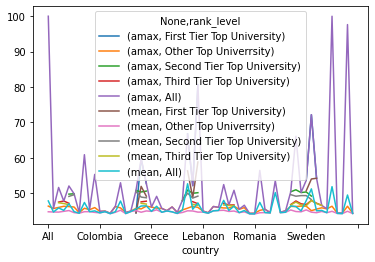

In [180]:
new_df.plot()

In [182]:
new_df['amax']['First Tier Top University'].head()

country
All          100.00
Argentina       NaN
Australia     51.61
Austria         NaN
Belgium       52.03
Name: First Tier Top University, dtype: float64